# Boston 房价数据集代入Pima处理过程

In [ ]:
## 数据集说明：

506,13,,,,,,,,,,,,
"CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"
CRIM：城镇人均犯罪率。
ZN：住宅用地超过 25000 sq.ft. 的比例。
INDUS：城镇非零售商用土地的比例。
CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。
NOX：一氧化氮浓度。
RM：住宅平均房间数。
AGE：1940 年之前建成的自用房屋比例。
DIS：到波士顿五个中心区域的加权距离。
RAD：辐射性公路的接近指数。
TAX：每 10000 美元的全值财产税率。
PTRATIO：城镇师生比例。
B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。
LSTAT：人口中地位低下者的比例。
MEDV：自住房的平均房价，以千美元计。
预测平均值的基准性能的均方根误差（RMSE）是约 9.21 千美元。

In [92]:
# 直接导入数据集
from sklearn.datasets import load_boston

data,target = load_boston(return_X_y = True) # True--导入target

print(data.shape)
data
target

(506, 13)


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [1]:
# 加载库
import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

import pandas as pd # 数据科学计算工具
import numpy as np # 数值计算工具
import matplotlib.pyplot as plt # 可视化
import seaborn as sns # matplotlib的高级API
%matplotlib inline 
# 在Notebook里面作图/嵌图
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [11]:
pima = pd.read_csv("boston_2.txt", sep=',', header=1, names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]) 
pima.head()
pima = pima.iloc[:, [0,1,2,4,5,6,7,8,9,10,11,12,13,3]] # iloc[  ] 可以直接指定各列的所有行！
pima.iloc[:,13]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
476    0.0
477    0.0
478    0.0
479    0.0
480    0.0
481    0.0
482    0.0
483    0.0
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
500    0.0
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [3]:
pima.groupby("CHAS").size() # 按二值分组计数

CHAS
0.0    471
1.0     35
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA9E518>,
      dtype=object)

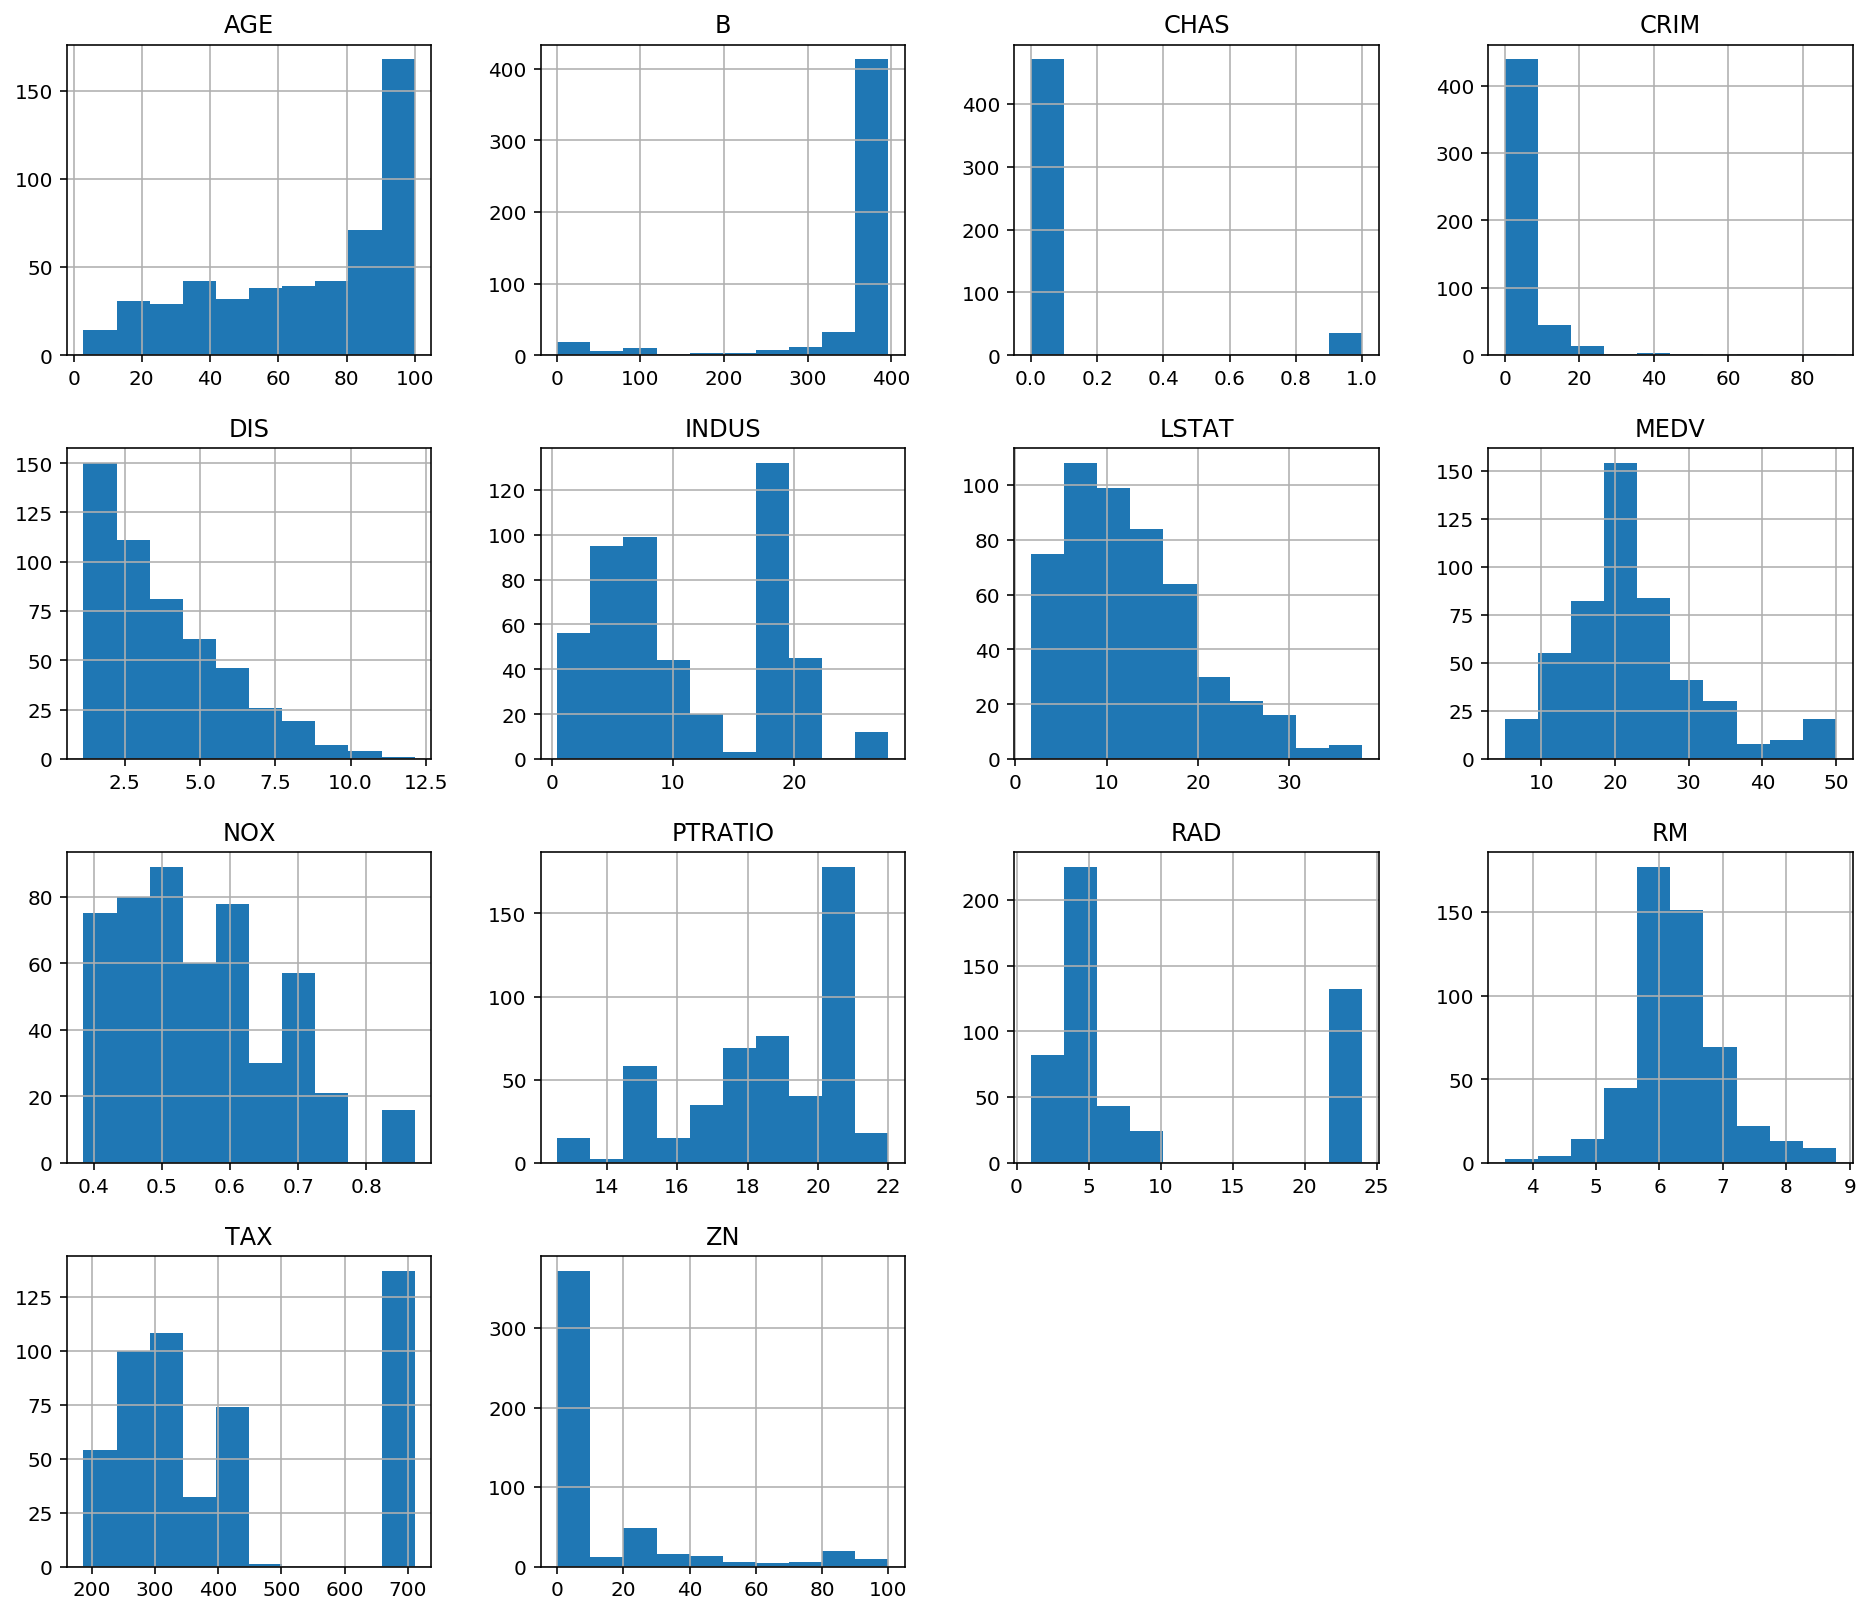

In [12]:
#查看每个字段的数据分布；figsize的参数显示的是每个子图的长和宽
pima.hist(figsize=(16,14)) 

In [13]:
# 各列的偏移度——Jason Brownlee. 正数图像向左。
skew = pima.skew()
print(skew)

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
CHAS       3.405904
dtype: float64


CRIM           AxesSubplot(0.125,0.71587;0.168478x0.16413)
ZN          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
INDUS       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
NOX         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
RM            AxesSubplot(0.125,0.518913;0.168478x0.16413)
AGE        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
DIS        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
RAD        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
TAX           AxesSubplot(0.125,0.321957;0.168478x0.16413)
PTRATIO    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
B          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
LSTAT      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
MEDV             AxesSubplot(0.125,0.125;0.168478x0.16413)
CHAS          AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

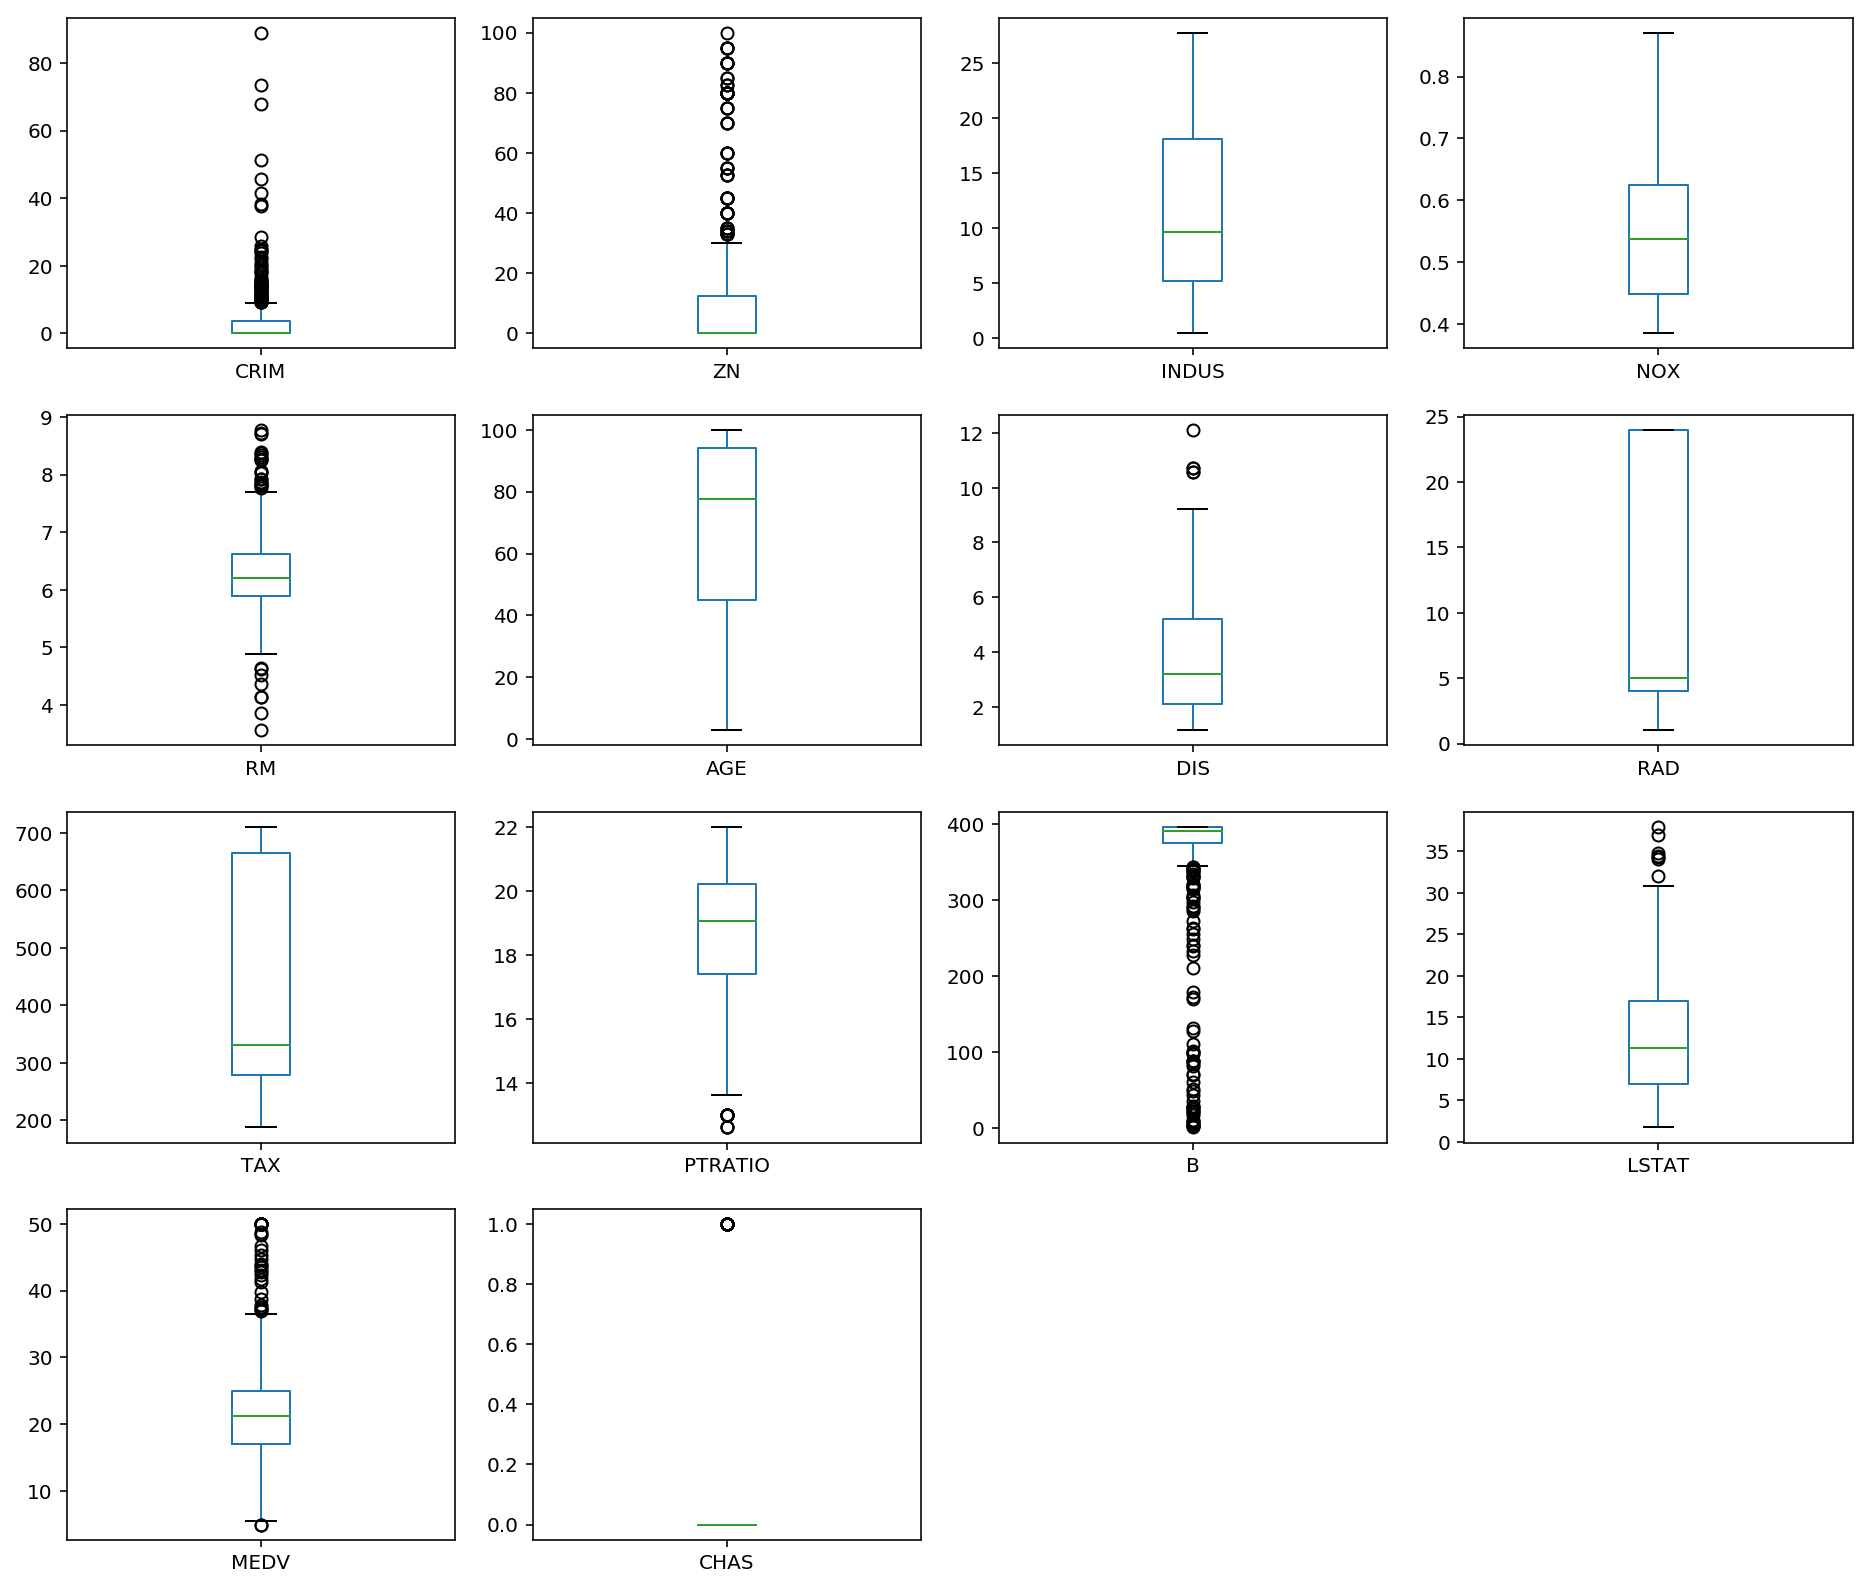

In [14]:
pima.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False, figsize=(16,14))

In [15]:
column_x = pima.columns[0:len(pima.columns) -1] # 选择特征列，去掉目标列(房价target)
column_x # 显示所有特征列信息

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

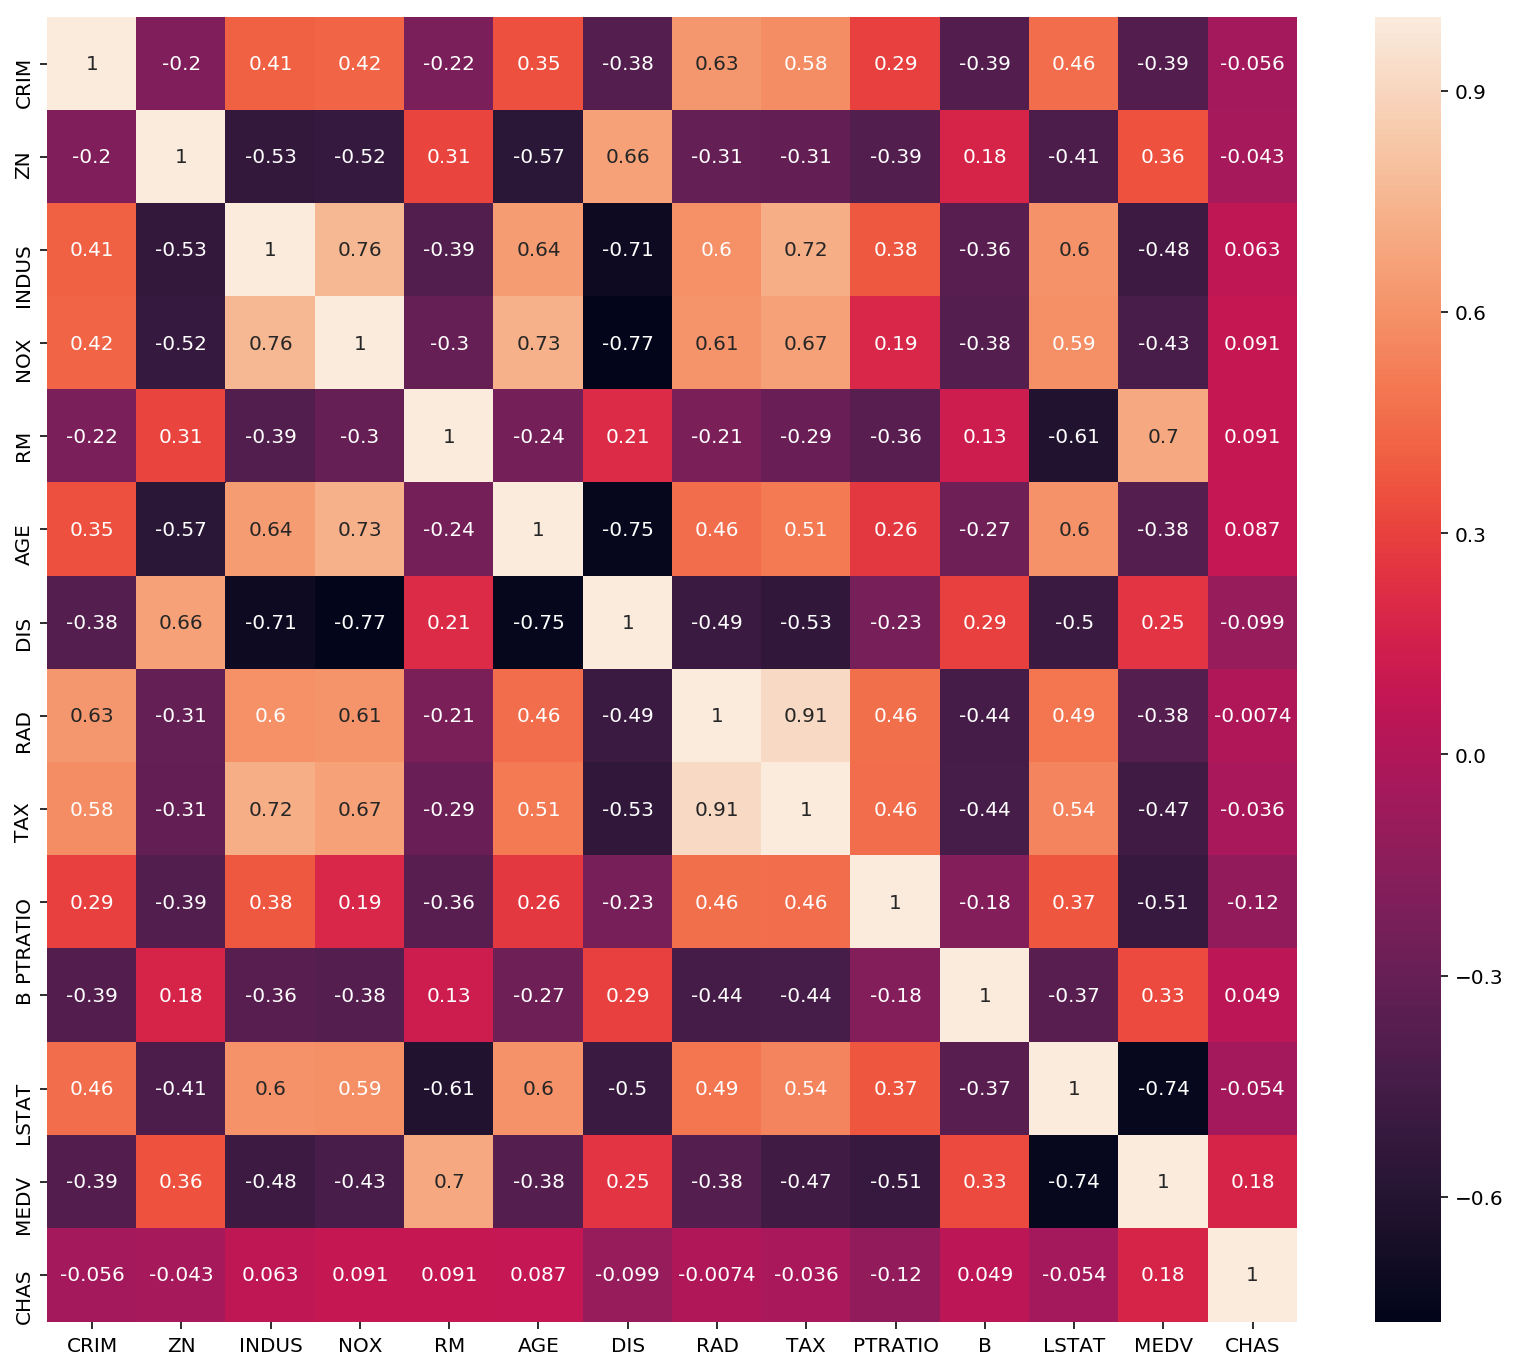

In [16]:
corr = pima[pima.columns].corr() # 计算变量的相关系数，得到一个N * N的矩阵
plt.subplots(figsize=(14,12)) # 可以先试用plt设置画布的大小，然后在作图，修改
sns.heatmap(corr, annot = True) # 使用热度图可视化这个相关系数矩阵

# 4 Feature Extraction 特征提取

In [17]:
# 导入和特征选择相关的包
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X = pima.iloc[:, 0:13] # 特征列 0-12列，不含第13列
Y = pima.iloc[:, 13] # 目标列为第13列
print(X.shape)
select_top_4 = SelectKBest(score_func=chi2, k =4) # 通过卡方检验选择4个得分最高的特征

fit = select_top_4.fit(X, Y) # 获取特征信息和目标值信息
features = fit.transform(X) # 特征转换 (后的数据框),只有4列
features.shape # out: (768, 4)
features[0:5] #新特征列,前5行4列，显示成5X4的矩阵？

(506, 13)


array([[ 18. ,  65.2, 296. ,  24. ],
       [  0. ,  78.9, 242. ,  21.6],
       [  0. ,  61.1, 242. ,  34.7],
       [  0. ,  45.8, 222. ,  33.4],
       [  0. ,  54.2, 222. ,  36.2]])

In [18]:
pima.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0


In [19]:
X_features = pd.DataFrame(data = features, columns=["ZN","Age","TAX","MEDV"]) 
# 查看特征矩阵的列值，对照原数据找到列名加入上面的columns里。
# 构造新特征DataFrame
X_features.head() # 显示4列前5行。

,ZN,Age,TAX,MEDV
0,18.0,65.2,296.0,24.0
1,0.0,78.9,242.0,21.6
2,0.0,61.1,242.0,34.7
3,0.0,45.8,222.0,33.4
4,0.0,54.2,222.0,36.2


# 5 Standardization - 标准化¶
它将属性值更改为 均值为0，标准差为1 的 高斯分布.

In [20]:
from sklearn.preprocessing import StandardScaler

rescaledX = StandardScaler().fit_transform(X_features) 
# 通过sklearn的preprocessing数据预处理中StandardScaler特征缩放 标准化特征信息

X = pd.DataFrame(data = rescaledX, columns = X_features.columns) 
# 构建新特征DataFrame

X.head()

,ZN,Age,TAX,MEDV
0,0.284830,-0.120013,-0.666608,0.159686
1,-0.487722,0.367166,-0.987329,-0.101524
2,-0.487722,-0.265812,-0.987329,1.324247
3,-0.487722,-0.809889,-1.106115,1.182758
4,-0.487722,-0.511180,-1.106115,1.487503


# 6 机器学习 - 构建二分类算法模型

In [21]:
from sklearn.model_selection import train_test_split

# 切分数据集为：特征训练集、特征测试集、目标训练集、目标测试集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 22, test_size = 0.2)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = []
models.append(("LR", LogisticRegression())) # 逻辑回归
models.append(("NB", GaussianNB())) # 高斯朴素贝叶斯
models.append(("KNN", KNeighborsClassifier())) # K近邻分类
models.append(("DT", DecisionTreeClassifier())) # 决策树分类
models.append(("SVM", SVC())) # 支持向量机分类

results = []
names = []
for name, model in models:
    kflod = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model, X_train,Y_train, cv = kflod,scoring="accuracy")
    names.append(name)
    results.append(cv_result)

for i in range(len(names)):
    print(names[i], results[i].mean)


LR <built-in method mean of numpy.ndarray object at 0x000000000E7A0D50>
NB <built-in method mean of numpy.ndarray object at 0x000000000E7A0DA0>
KNN <built-in method mean of numpy.ndarray object at 0x000000000E7A0A80>
DT <built-in method mean of numpy.ndarray object at 0x000000000E423F80>
SVM <built-in method mean of numpy.ndarray object at 0x000000000E423260>


## 基于PCA和网格搜索SVM参数

Text(0,0.5,'Second principal component')

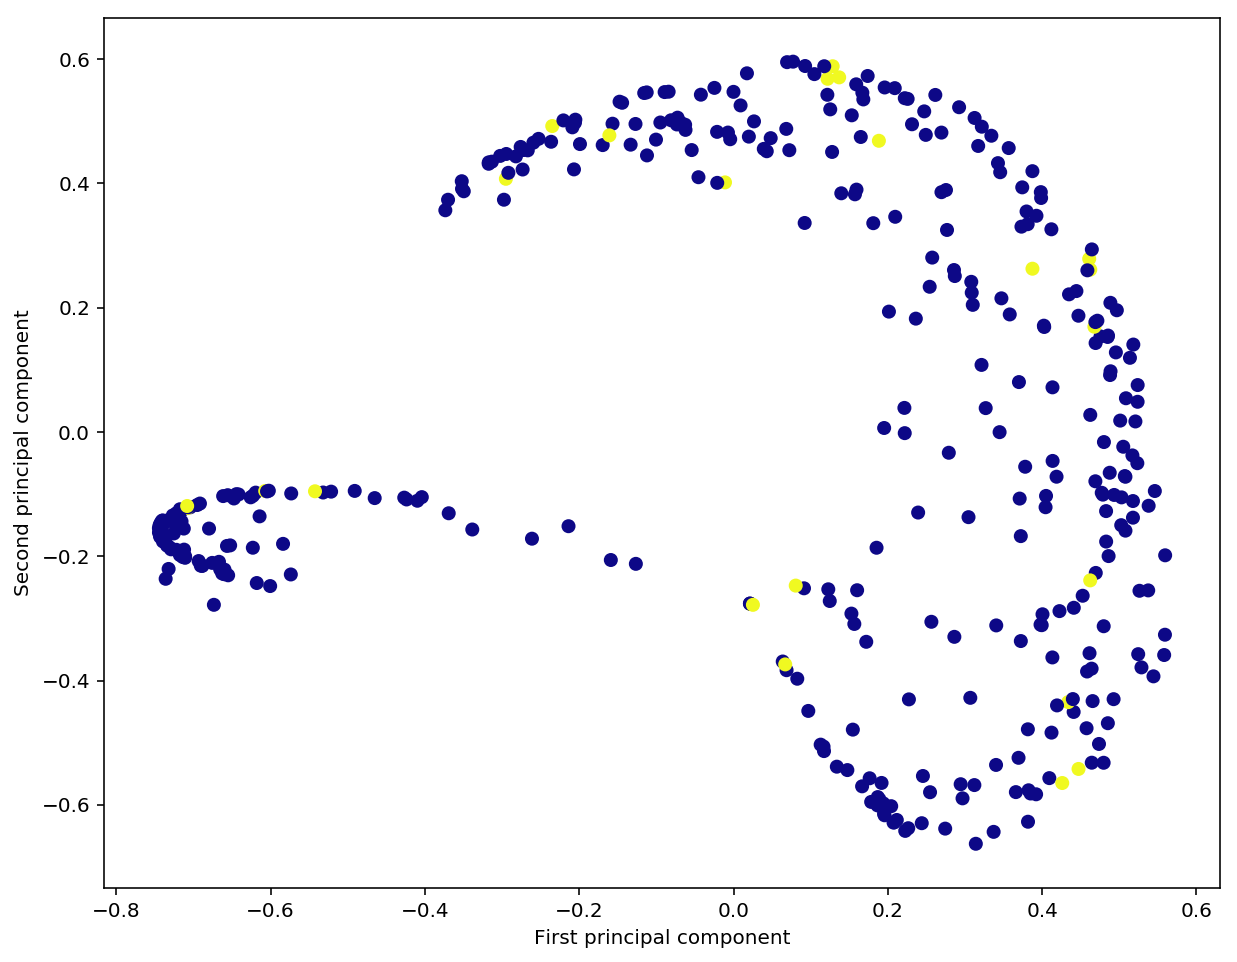

In [22]:
# 【1】 Applying Kernel PCA

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_pca = kpca.fit_transform(X_train)
X_test_pca = kpca.transform(X_test)

plt.figure(figsize=(10,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=Y_train,cmap='plasma')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [23]:
# 【2】SVC

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_pca, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# 使用SVC预测生存

y_pred = classifier.predict(X_test_pca)
cm = confusion_matrix(Y_test, y_pred)
cm # out: array([[86, 14],
      #                  [30, 24]], dtype=int64)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        92
        1.0       0.00      0.00      0.00        10

avg / total       0.81      0.90      0.86       102



In [25]:
# 使用 网格搜索 来提高模型

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose = 2)
grid.fit(X_train_pca, Y_train)

# 预测
grid_predictions = grid.predict(X_test_pca)

# 分类报告
print(classification_report(Y_test,grid_predictions))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


# 7 可视化结果

[Text(0,0,'LR'),
 Text(0,0,'NB'),
 Text(0,0,'KNN'),
 Text(0,0,'DT'),
 Text(0,0,'SVM')]

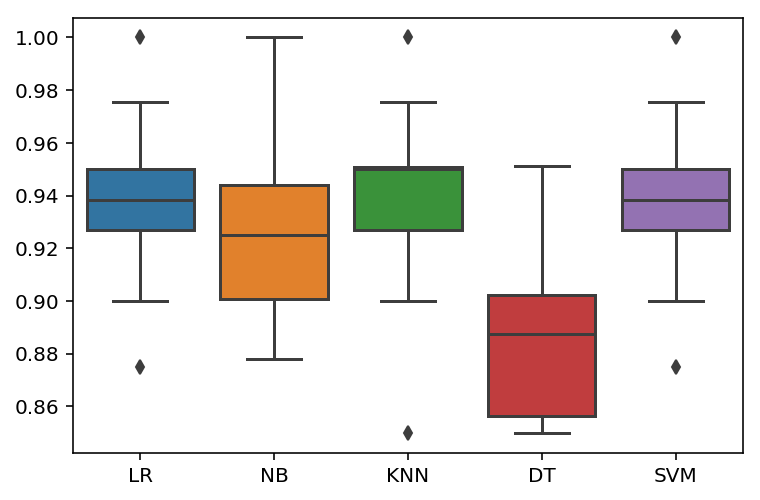

In [26]:
ax = sns.boxplot(data = results)
ax.set_xticklabels(names)

# 8 使用测试数据预测

0.9019607843137255
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        92
        1.0       0.00      0.00      0.00        10

avg / total       0.81      0.90      0.86       102



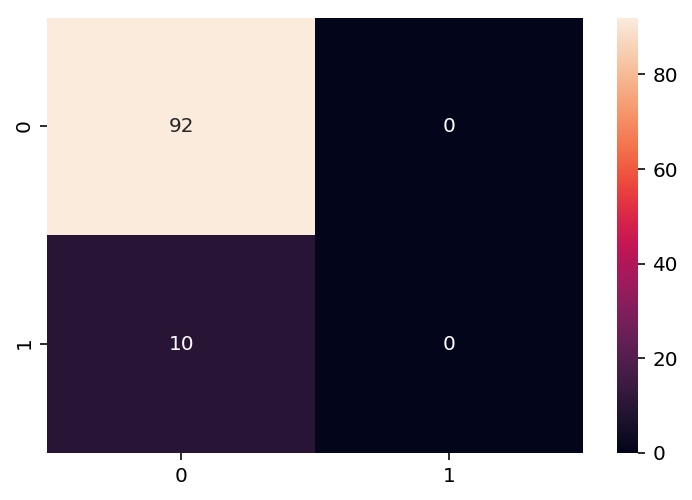

In [27]:
# 使用逻辑回归预测 

lr = LogisticRegression() # LR模型构建
lr.fit(X_train, Y_train) # 
predictions = lr.predict(X_test) # 使用测试值预测

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(accuracy_score(Y_test, predictions)) # 打印评估指标（分类准确率）

print(classification_report(Y_test,predictions)) 

conf = confusion_matrix(Y_test, predictions) # 混淆矩阵

label = ["0","1"] # 
sns.heatmap(conf, annot = True, xticklabels=label, yticklabels=label)

# Is over !